<a href="https://colab.research.google.com/github/alan8833/-../blob/master/%E6%AD%A1%E8%BF%8E%E4%BD%BF%E7%94%A8_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import pandas as pd
import keras.utils
from keras import utils as np_utils
from keras.datasets import mnist
(x_Train , y_Train),(x_Test , y_Test) = mnist.load_data()
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D( filters=36, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 36)          0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 7, 7, 36)          0         
                                                                 
 flatten_9 (Flatten)         (None, 1764)             

In [61]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
# 開始訓練
train_history=model.fit(x=x_Train4D_normalize, y=y_TrainOneHot,validation_split=0.2, epochs=150, batch_size=300,verbose=2)

Epoch 1/120
160/160 - 5s - loss: 0.4758 - acc: 0.8499 - val_loss: 0.0947 - val_acc: 0.9730 - 5s/epoch - 31ms/step
Epoch 2/120
160/160 - 4s - loss: 0.1351 - acc: 0.9590 - val_loss: 0.0678 - val_acc: 0.9796 - 4s/epoch - 26ms/step
Epoch 3/120
160/160 - 4s - loss: 0.1020 - acc: 0.9692 - val_loss: 0.0508 - val_acc: 0.9848 - 4s/epoch - 26ms/step
Epoch 4/120
160/160 - 5s - loss: 0.0852 - acc: 0.9746 - val_loss: 0.0498 - val_acc: 0.9845 - 5s/epoch - 29ms/step
Epoch 5/120
160/160 - 4s - loss: 0.0699 - acc: 0.9794 - val_loss: 0.0405 - val_acc: 0.9891 - 4s/epoch - 26ms/step
Epoch 6/120
160/160 - 4s - loss: 0.0621 - acc: 0.9816 - val_loss: 0.0397 - val_acc: 0.9887 - 4s/epoch - 25ms/step
Epoch 7/120
160/160 - 4s - loss: 0.0562 - acc: 0.9824 - val_loss: 0.0400 - val_acc: 0.9892 - 4s/epoch - 26ms/step
Epoch 8/120
160/160 - 4s - loss: 0.0522 - acc: 0.9835 - val_loss: 0.0348 - val_acc: 0.9896 - 4s/epoch - 26ms/step
Epoch 9/120
160/160 - 4s - loss: 0.0464 - acc: 0.9857 - val_loss: 0.0356 - val_acc: 0.99

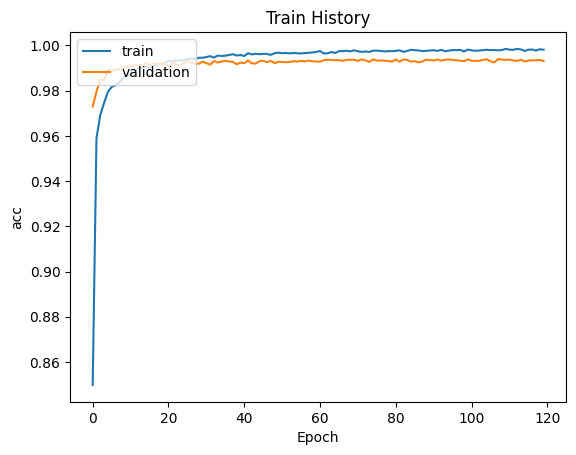

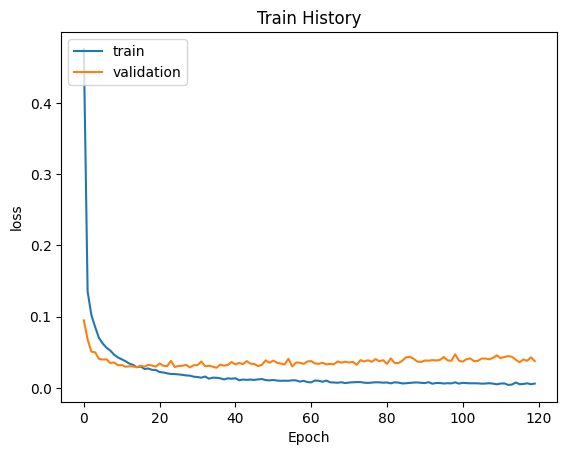

In [62]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
import matplotlib.pyplot as plt
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history, 'loss', 'val_loss')

In [63]:
loss, accuracy = model.evaluate(x_Test4D_normalize , y_TestOneHot)
print( "\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy* 100 ))

313/313 [==============================] - 1s 3ms/step - loss: 0.0297 - acc: 0.9935

Loss: 0.03, Accuracy: 99.35%
